# Análisis de Componentes Principales (PCA)

##### 1. Análisis de Variables Categóricas y Evaluación para PCA

In [8]:
import pandas as pd

data_path = "../../data/movies_clean.csv"
df = pd.read_csv(data_path)

print(df.head())

# Identificar las variables categóricas
categorical_vars = df.select_dtypes(include=['object']).columns.tolist()

# Mostrar las variables categóricas
print(" Variables categóricas en el dataset:")
print(categorical_vars)

# Ver los valores únicos en algunas de estas variables
for var in categorical_vars[:5]:  # Mostramos solo las primeras 5 variables categóricas
    print(f"\n {var}:")
    print(df[var].value_counts().head(10))  # Mostrar solo las 10 categorías más comunes

# Evaluar las categorías únicas en cada variable
unique_counts = df[categorical_vars].nunique()
print("\n Número de categorías únicas por variable categórica:")
print(unique_counts)

# Estrategia de transformación
# Eliminamos variables con muchas categorías o sin relevancia
columns_to_drop = ["id", "title", "releaseDate", "homePage", "actorsCharacter"]
df_filtered = df.drop(columns=columns_to_drop)

# Aplicamos One-Hot Encoding a variables con pocas categorías
low_cardinality_vars = unique_counts[unique_counts < 10].index.tolist()
df_encoded = pd.get_dummies(df_filtered, columns=low_cardinality_vars)

#  Revisar el nuevo dataset con variables categóricas transformadas
print("\n Datos transformados con One-Hot Encoding:")
print(df_encoded.info())

# Comparar la cantidad de variables antes y después
print(f"\n Columnas originales: {df.shape[1]} | Columnas después de transformación: {df_encoded.shape[1]}")

if df_encoded.shape[1] > df.shape[1] * 1.5: 
    print("\n Se agregaron muchas variables, lo que puede afectar el PCA. Se recomienda evaluar su impacto antes de incluirlas.")
else:
    print("\n La transformación categórica no añadió demasiadas variables, por lo que podría considerarse en el PCA.")


   id    budget                            genres  \
0   5   4000000                      Crime|Comedy   
1   6  21000000             Action|Thriller|Crime   
2  11  11000000  Adventure|Action|Science Fiction   
3  12  94000000                  Animation|Family   
4  13  55000000              Comedy|Drama|Romance   

                                            homePage  \
0          https://www.miramax.com/movie/four-rooms/   
1                                                NaN   
2  http://www.starwars.com/films/star-wars-episod...   
3              http://movies.disney.com/finding-nemo   
4                                                NaN   

                            productionCompany productionCompanyCountry  \
0                        Miramax|A Band Apart                    US|US   
1  Universal Pictures|Largo Entertainment|JVC                 US|US|JP   
2                  Lucasfilm|20th Century Fox                    US|US   
3                                       Pixar   

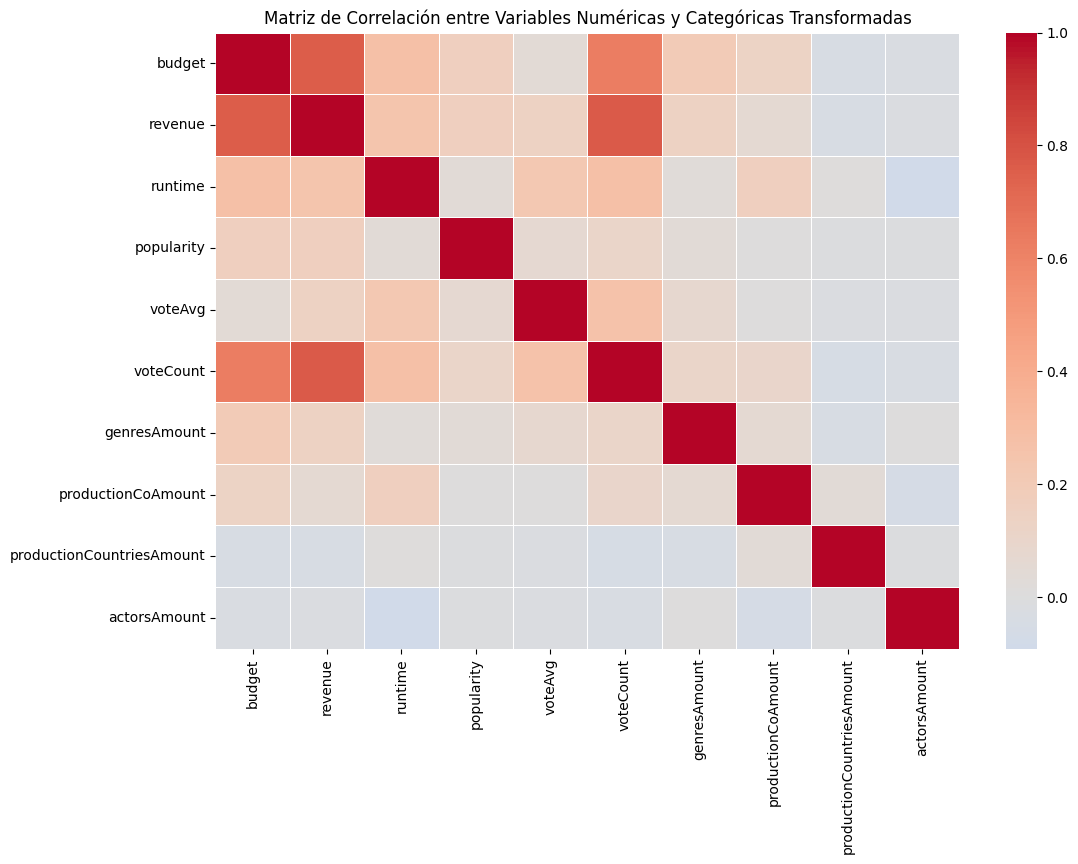


 Correlaciones más altas con las variables categóricas transformadas:
budget                     budget                       1.000000
popularity                 popularity                   1.000000
runtime                    runtime                      1.000000
revenue                    revenue                      1.000000
productionCoAmount         productionCoAmount           1.000000
genresAmount               genresAmount                 1.000000
actorsAmount               actorsAmount                 1.000000
productionCountriesAmount  productionCountriesAmount    1.000000
voteCount                  voteCount                    1.000000
voteAvg                    voteAvg                      1.000000
revenue                    voteCount                    0.768255
voteCount                  revenue                      0.768255
budget                     revenue                      0.757454
revenue                    budget                       0.757454
voteCount          

In [9]:
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt

# Asegurar que solo se usen columnas numéricas
df_numeric = df_encoded.select_dtypes(include=[np.number])

# Calcular la matriz de correlación solo con datos numéricos
correlation_matrix = df_numeric.corr()

# Generar un mapa de calor para visualizar la correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", center=0, linewidths=0.5)

plt.title("Matriz de Correlación entre Variables Numéricas y Categóricas Transformadas")
plt.show()

# Mostrar las correlaciones más altas con las variables categóricas transformadas
print("\n Correlaciones más altas con las variables categóricas transformadas:")
print(correlation_matrix.unstack().sort_values(ascending=False).head(20))

##### 2. Índice KMO y la prueba de esfericidad de Bartlett

   id    budget                            genres  \
0   5   4000000                      Crime|Comedy   
1   6  21000000             Action|Thriller|Crime   
2  11  11000000  Adventure|Action|Science Fiction   
3  12  94000000                  Animation|Family   
4  13  55000000              Comedy|Drama|Romance   

                                            homePage  \
0          https://www.miramax.com/movie/four-rooms/   
1                                                NaN   
2  http://www.starwars.com/films/star-wars-episod...   
3              http://movies.disney.com/finding-nemo   
4                                                NaN   

                            productionCompany productionCompanyCountry  \
0                        Miramax|A Band Apart                    US|US   
1  Universal Pictures|Largo Entertainment|JVC                 US|US|JP   
2                  Lucasfilm|20th Century Fox                    US|US   
3                                       Pixar   

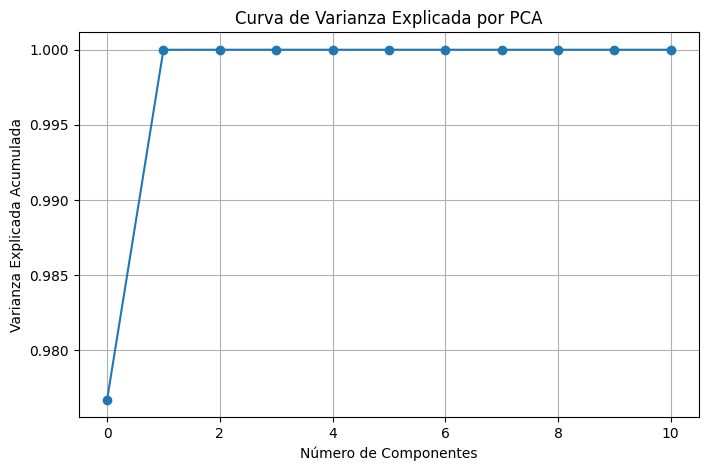

Se necesitan 1 componentes principales para explicar al menos el 90% de la varianza total.


In [9]:
from scipy.stats import bartlett
from factor_analyzer import calculate_kmo
from sklearn.decomposition import PCA


# Cargar el dataset
file_path = "../../data/movies_clean.csv"
df = pd.read_csv(file_path)

# Verificar los datos
print(df.head())

# Asegurar que solo se usen columnas numéricas para KMO y Bartlett
df_numeric = df.select_dtypes(include=[np.number])

# Aplicar KMO y Bartlett para evaluar si es adecuado aplicar PCA
kmo_all, kmo_model = calculate_kmo(df_numeric)
print(f"Índice KMO: {kmo_model:.4f}")

# Prueba de esfericidad de Bartlett
chi_square_value, p_value = bartlett(*[df_numeric[col] for col in df_numeric.columns])
print(f"Prueba de Bartlett - Valor Chi-cuadrado: {chi_square_value:.4f}, p-valor: {p_value:.4f}")

# Interpretación de los resultados
if kmo_model > 0.6 and p_value < 0.05:
    print("Los datos son adecuados para PCA.")
else:
    print("Los datos no son adecuados para PCA.")

# Aplicación de PCA
pca = PCA()
df_pca = pca.fit_transform(df_numeric)

# Varianza explicada por cada componente principal
explained_variance_ratio = pca.explained_variance_ratio_

# Visualización de la varianza explicada acumulada
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(explained_variance_ratio), marker='o', linestyle='-')
plt.xlabel("Número de Componentes")
plt.ylabel("Varianza Explicada Acumulada")
plt.title("Curva de Varianza Explicada por PCA")
plt.grid()
plt.show()

# Mostrar la cantidad de componentes necesarias para explicar al menos el 90% de la varianza
num_components = np.argmax(np.cumsum(explained_variance_ratio) >= 0.90) + 1
print(f"Se necesitan {num_components} componentes principales para explicar al menos el 90% de la varianza total.")


##### 3. Análisis de componentes principales con variables numéricas

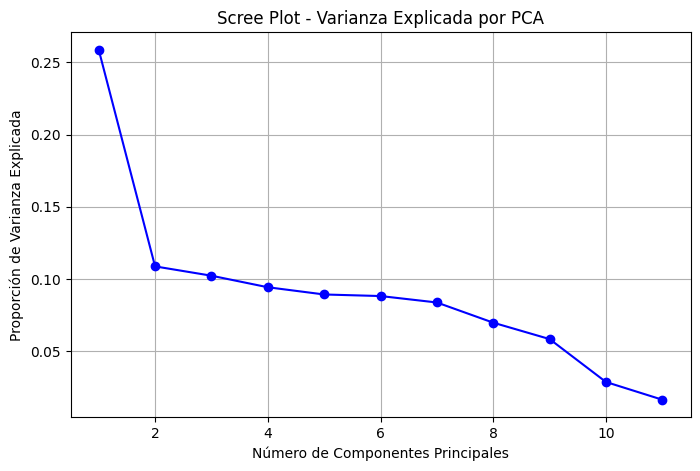

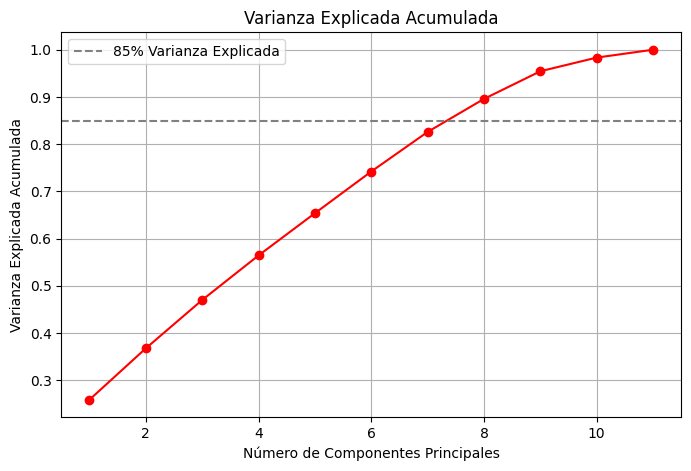


 Carga de cada variable en los componentes principales:


,id,budget,revenue,runtime,popularity,voteAvg,voteCount,genresAmount,productionCoAmount,productionCountriesAmount,actorsAmount
0,-0.225102,0.501921,0.519759,0.285925,0.119149,0.172720,0.508017,0.160785,0.115109,-0.041302,-0.050841
1,0.538927,0.102307,0.197044,-0.298472,0.557324,0.017949,0.112183,-0.142039,-0.277156,-0.020352,0.387630
2,0.327944,-0.132510,-0.092215,0.382328,0.240977,0.394636,-0.006707,-0.327441,0.363503,0.434436,-0.279779
3,-0.034531,-0.228901,-0.118449,0.183264,-0.020290,0.717354,0.017973,0.067058,-0.379278,-0.484050,0.028472
4,0.085539,-0.043718,-0.161717,-0.067952,0.367096,0.079233,-0.175792,0.741038,0.467387,-0.137260,0.040415
5,-0.018389,-0.037895,-0.020241,0.096390,-0.365540,0.239213,0.043231,0.145148,0.096957,0.421352,0.766686
6,-0.148742,-0.017001,0.006547,-0.143669,0.130108,0.126172,-0.029728,0.395659,-0.549537,0.610670,-0.302849
7,-0.437204,-0.024966,-0.166859,0.530497,0.506235,-0.256573,-0.221625,-0.116775,-0.176113,0.013740,0.287919
8,0.571219,0.107803,0.036340,0.570629,-0.264966,-0.297023,-0.095203,0.297695,-0.264152,-0.072678,-0.063053
9,-0.000810,0.697681,-0.026350,-0.082536,-0.069312,0.255755,-0.649810,-0.114527,-0.008766,-0.006207,-0.005856



 Se recomienda usar 8 componentes principales para explicar al menos el 85% de la varianza.

 Datos transformados con PCA:


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,-0.318271,-0.485080,-0.705455,-0.152612,-0.735053,-0.362956,-0.052610,0.640797
1,0.003356,-0.890726,-0.289746,0.133237,0.159499,0.145831,0.324204,0.608938
2,6.192413,1.065389,-0.121417,1.319385,-1.651721,0.451622,0.400616,-1.607483
3,7.318344,2.023431,-0.791701,0.323215,-2.631679,-0.061614,0.329425,-1.836650
4,7.780219,0.970934,0.129258,1.521235,-2.068855,0.725967,0.218058,-1.772674


In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Seleccionar solo las variables numéricas
df_numeric = df.select_dtypes(include=[np.number])

# Estandarizar los datos
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# Aplicar PCA
pca = PCA()
pca.fit(df_scaled)

# Obtener la varianza explicada por cada componente
explained_variance = pca.explained_variance_ratio_

# Graficar la varianza explicada (Scree Plot)
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker="o", linestyle="-", color="b")
plt.xlabel("Número de Componentes Principales")
plt.ylabel("Proporción de Varianza Explicada")
plt.title("Scree Plot - Varianza Explicada por PCA")
plt.grid()
plt.show()

# Mostrar la varianza acumulada
varianza_acumulada = np.cumsum(explained_variance)
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(varianza_acumulada) + 1), varianza_acumulada, marker="o", linestyle="-", color="r")
plt.xlabel("Número de Componentes Principales")
plt.ylabel("Varianza Explicada Acumulada")
plt.title("Varianza Explicada Acumulada")
plt.axhline(y=0.85, color="gray", linestyle="--", label="85% Varianza Explicada")
plt.legend()
plt.grid()
plt.show()

# Cargar los componentes principales en un DataFrame para interpretar
pca_components = pd.DataFrame(pca.components_, columns=df_numeric.columns)
print("\n Carga de cada variable en los componentes principales:")
display(pca_components)

# Determinar el número de componentes a usar
num_components = np.argmax(varianza_acumulada >= 0.85) + 1
print(f"\n Se recomienda usar {num_components} componentes principales para explicar al menos el 85% de la varianza.")

# Reducir la dimensionalidad usando los componentes principales seleccionados
pca_reduced = PCA(n_components=num_components)
df_pca = pca_reduced.fit_transform(df_scaled)

# Convertir a DataFrame
df_pca = pd.DataFrame(df_pca, columns=[f"PC{i+1}" for i in range(num_components)])
print("\n Datos transformados con PCA:")
display(df_pca.head())


Forma de df_pca: (10000, 2)


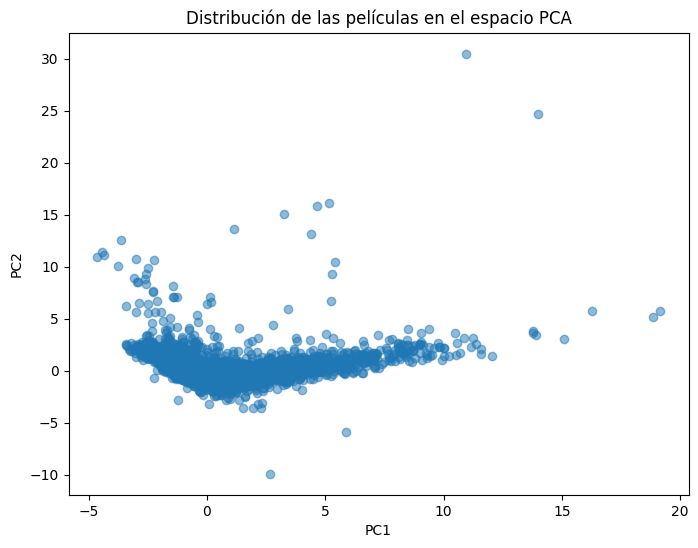

In [13]:
# Aplicar PCA con las primeras dos componentes
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)  # Asegúrate de que df_scaled está definido

print("Forma de df_pca:", df_pca.shape)  # Debe tener dos columnas

plt.figure(figsize=(8,6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], alpha=0.5)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Distribución de las películas en el espacio PCA")
plt.show()
